# 🌑 Dark Face Enhancement App - Colab Notebook

Este notebook prepara el entorno, **actualiza el código a la última versión**, descarga el dataset y lanza la aplicación.

### Instrucciones:
1. Ejecuta la celda de **Configuración** (esto borrará la versión anterior y clonará la última).
2. Ejecuta la celda de **Descarga de Datos**.
3. Ejecuta la celda de **Lanzamiento**.

In [1]:
# --- 1. CONFIGURACIÓN Y ACTUALIZACIÓN DEL ENTORNO ---
import os
import shutil
import sys

REPO_URL = "https://github.com/bripedev-source/a1_vision_artificial"
REPO_NAME = "a1_vision_artificial"
APP_FOLDER = "dark_face_app"

print("🔄 Verificando actualizaciones...")

# 1.1 Limpieza: Si existe el repo, lo borramos para bajar la última versión
if os.path.exists(REPO_NAME):
    print(f"🗑️ Eliminando versión antigua de '{REPO_NAME}'...")
    shutil.rmtree(REPO_NAME)

# 1.2 Clonado Fresco
print(f"⬇️ Clonando repositorio: {REPO_URL}...")
!git clone {REPO_URL}

# 1.3 Moverse al directorio correcto
if os.path.exists(REPO_NAME):
    os.chdir(REPO_NAME)
    if os.path.exists(APP_FOLDER):
        os.chdir(APP_FOLDER)
    print(f"📂 Directorio de trabajo: {os.getcwd()}")

# 1.4 Instalar Dependencias
# NOTA: Añadido soporte explícito para MCP y watchfiles
print("📦 Instalando dependencias...")
%pip install "gradio[mcp]>=5.9.0" opencv-python numpy matplotlib kagglehub watchfiles

🔄 Verificando actualizaciones...
⬇️ Clonando repositorio: https://github.com/bripedev-source/a1_vision_artificial...
Cloning into 'a1_vision_artificial'...
remote: Enumerating objects: 131, done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 131 (from 2)
Receiving objects: 100% (131/131), 47.88 MiB | 22.47 MiB/s, done.
📂 Directorio de trabajo: /content/a1_vision_artificial/dark_face_app
📦 Instalando dependencias...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 9.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: mcp
    Found existing installation: mcp 1.24.0
    Uninstalling mcp-1.24.0:
      Successfully uninstalled mcp-1.24.0


⬇️ Descargando dataset 'soumikrakshit/dark-face-dataset'...
Using Colab cache for faster access to the 'dark-face-dataset' dataset.
✅ Dataset descargado en: /kaggle/input/dark-face-dataset

📸 Muestras aleatorias de verificación:


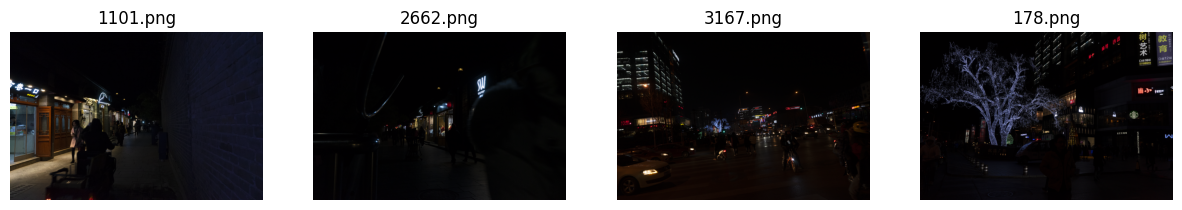

✅ Imágenes de muestra copiadas a 'img'.


In [2]:
# --- 2. DESCARGA Y PREPARACIÓN DE DATOS ---
import kagglehub
import shutil
import random
import matplotlib.pyplot as plt
from PIL import Image

print("⬇️ Descargando dataset 'soumikrakshit/dark-face-dataset'...")
base_path = kagglehub.dataset_download('soumikrakshit/dark-face-dataset')
print(f"✅ Dataset descargado en: {base_path}")

# Identificar carpeta de imágenes
img_dir = os.path.join(base_path, "image") 
if not os.path.exists(img_dir):
    img_dir = base_path

# Copiar muestras iniciales a la carpeta 'img' del proyecto
target_dir = "img"
os.makedirs(target_dir, exist_ok=True)

# Solo para visualizar que todo va bien
all_imgs = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.png'))]
selected_imgs = random.sample(all_imgs, min(4, len(all_imgs)))

print("\n📸 Muestras aleatorias de verificación:")
plt.figure(figsize=(15, 5))

for i, name in enumerate(selected_imgs):
    src_path = os.path.join(img_dir, name)
    dst_path = os.path.join(target_dir, name)
    shutil.copy(src_path, dst_path)
    
    img = Image.open(src_path)
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")

plt.show()
print(f"✅ Imágenes de muestra copiadas a '{target_dir}'.")

In [3]:
# --- 3. LANZAMIENTO DE LA APP (Modo MCP) ---
import os
import sys

# Import vital para que Python vea los módulos si no está en el path
if os.path.abspath(".") not in sys.path:
    sys.path.append(os.path.abspath("."))

# CAMBIO: Importamos la interfaz MCP en lugar de la UI normal
from mcp_interface import build_mcp_interface

try:
    print("🚀 Lanzando Dark Face App con Servidor MCP...")
    print("🔗 Haz clic en el enlace público 'gradio.live' para la UI.")
    print("🔌 Conecta tu cliente MCP (Claude/Cursor) a la URL del servidor.")
    
    # Construimos la interfaz MCP
    demo = build_mcp_interface()
    
    # Lanzamos habilitando el servidor MCP
    demo.launch(share=True, inbrowser=False, mcp_server=True)
    
except Exception as e:
    print(f"❌ Error lanzando la app: {e}")

🚀 Lanzando Dark Face App con Servidor MCP...
🔗 Haz clic en el enlace público 'gradio.live' para la UI.
🔌 Conecta tu cliente MCP (Claude/Cursor) a la URL del servidor.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://79558259d8f25d8fae.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)

🔨 Launching MCP server:
** Streamable HTTP URL: https://79558259d8f25d8fae.gradio.live/gradio_api/mcp/
* [Deprecated] SSE URL: https://79558259d8f25d8fae.gradio.live/gradio_api/mcp/sse
